### Cat Classification Using CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow==2.9.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [ ]:
import keras as keras
print(keras.__version__)

2.9.0


**Cat Classification with feed forward neural netwrok **



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam, RMSprop, SGD, RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

%matplotlib inline
np.random.seed(1)

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [ ]:
parent_path = '/content/drive/MyDrive/Deep Learning Course/data'

In [ ]:
train_dataset = h5py.File(parent_path+'/train.h5', "r")

train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

print('shape of x_train dataset ',train_set_x_orig.shape)
print('dimensions of x_train dataset ',train_set_x_orig.ndim)


print('shape of y_train dataset ',train_set_y_orig.shape)
print('dimensions of y_train dataset ',train_set_y_orig.ndim)

shape of x_train dataset  (209, 64, 64, 3)
dimensions of x_train dataset  4
shape of y_train dataset  (209,)
dimensions of y_train dataset  1


In [ ]:
test_dataset = h5py.File(parent_path+'/test.h5', "r")

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

print('shape of x_test dataset ',test_set_x_orig.shape)
print('dimensions of x_test dataset ',test_set_x_orig.ndim)

print('shape of y_test dataset ',test_set_y_orig.shape)
print('dimensions of y_test dataset ',test_set_y_orig.ndim)

shape of x_test dataset  (50, 64, 64, 3)
dimensions of x_test dataset  4
shape of y_test dataset  (50,)
dimensions of y_test dataset  1


In [ ]:
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
print(train_set_y.shape)
print(test_set_y.shape)

(1, 209)
(1, 50)


In [ ]:
classes = np.array(test_dataset["list_classes"][:]) # the list of classes
classes

array([b'non-cat', b'cat'], dtype='|S7')

y = [1], it's a 'cat' picture.


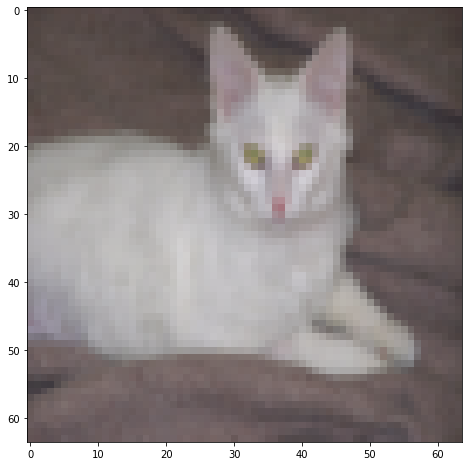

In [ ]:
index = 109
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [ ]:
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [ ]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Dataset dimensions:")
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

Dataset dimensions:
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


In [ ]:

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)
train_set_y = train_set_y.T
test_set_y = test_set_y.T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (209, 12288)
train_set_y shape: (209, 1)
test_set_x_flatten shape: (50, 12288)
test_set_y shape: (50, 1)


In [ ]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [ ]:
# Utility function
def evaluate_this_model(model):
    history = model.fit(train_set_x, train_set_y, epochs=50, verbose=True)
    results = model.evaluate(test_set_x, test_set_y)
    #x = model.predict_classes(test_set_x)

    plt.plot(np.squeeze(history.history["loss"]))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    print("\n\nAccuracy on training set is {}".format(history.history["accuracy"][-1]))
    print("\nAccuracy on test set is {}".format(results[1]))
    #print(" model predictions :",x)

In [ ]:
model = Sequential()

model.add(Dense(25, activation='relu', input_dim=train_set_x_flatten.shape[1]))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
learning_rate = 0.0001
opt = Adam(lr=learning_rate)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
7/7 [==============================] - 1s 10ms/step - loss: 0.6877 - accuracy: 0.5885
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6586 - accuracy: 0.6555
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6487 - accuracy: 0.6555
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6407 - accuracy: 0.6555
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6354 - accuracy: 0.6555
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6360 - accuracy: 0.6555
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6273 - accuracy: 0.6555
Epoch 8/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6192 - accuracy: 0.6555
Epoch 9/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6105 - accuracy: 0.6555
Epoch 10/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6082 - accuracy: 0.6555
Epoch 11/50
7/7 [=====================

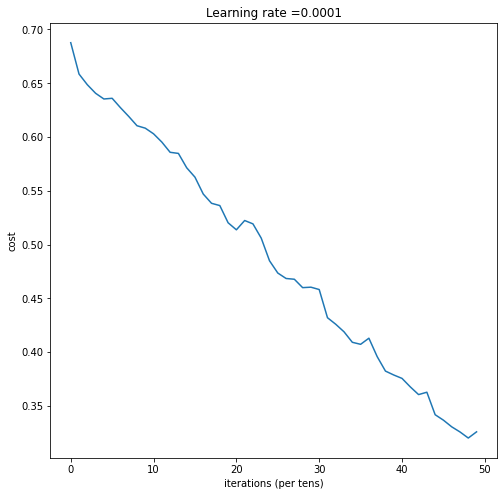



Accuracy on training set is 0.8899521827697754

Accuracy on test set is 0.7400000095367432


In [ ]:
h = evaluate_this_model(model)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                307225    
                                                                 
 dense_7 (Dense)             (None, 30)                780       
                                                                 
 dense_8 (Dense)             (None, 20)                620       
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 308,896
Trainable params: 308,896
Non-tr

Cat classification with CCN **algorithm**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, Flatten, MaxPooling2D, Activation, Dropout
from keras.optimizers import Adam, RMSprop, SGD
from keras.losses import BinaryCrossentropy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

In [ ]:
'''import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import random

%matplotlib inline'''


'import tensorflow as tf\nfrom tensorflow.keras.losses import BinaryCrossentropy\nfrom tensorflow.keras import Sequential\nfrom tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation\nfrom tensorflow.keras.optimizers import Adam\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport h5py\nimport random\n\n%matplotlib inline'

In [ ]:
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value-1)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value+1)
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value+2)
from keras import backend as K

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)

tf.compat.v1.keras.backend.set_session(sess)

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#np.random.seed(1)

## 1 - Overview of the data set

First of all, we'll load the data. After loading, here's a basic overview;

- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

In [ ]:
parent_path = '/content/drive/MyDrive/Deep Learning Course/data'
train_dataset = h5py.File(parent_path+'/train.h5', "r")

In [ ]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

In [ ]:
test_dataset = h5py.File(parent_path+'/test.h5', "r")

In [ ]:
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

In [ ]:
classes = np.array(test_dataset["list_classes"][:]) # the list of classes
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [ ]:
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))

In [ ]:
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

In [ ]:

print(train_set_y.shape)
print(test_set_y.shape)

(1, 209)
(1, 50)


Each line of train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the index value and re-run to see other images.

y = [0], it's a 'non-cat' picture.


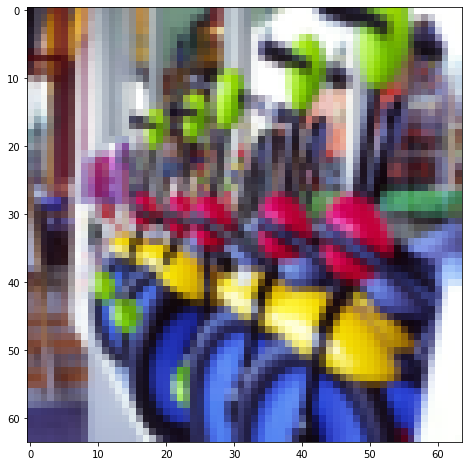

In [ ]:
# Example of a picture
index = 70
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

y = [1], it's a 'cat' picture.


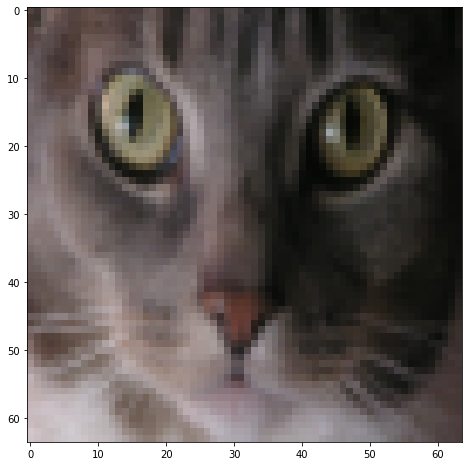

In [ ]:
# Example of a picture
index = 60
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

# 2 - Data preprocessing

Following are the steps to preprocess data for a ConvNet.

- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- "Standardize" the data
- Data Augmentation (will discuss later in the course)

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs.

### 2.1 Dimensions of our data

In [ ]:
m_train = train_set_x_orig.shape[0]
print ("Number of training samples: m_train = " + str(m_train))

Number of training samples: m_train = 209


In [ ]:
m_test = test_set_x_orig.shape[0]
print ("Number of testing samples: m_test = " + str(m_test))

Number of testing samples: m_test = 50


In [ ]:
num_px = train_set_x_orig.shape[1]
print ("Height/Width of each image: num_px = " + str(num_px))

Height/Width of each image: num_px = 64


In [ ]:
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")


Each image is of size: (64, 64, 3)


Transport of Y 

In [ ]:
train_set_y = train_set_y.T

In [ ]:
test_set_y = test_set_y.T

Make new Dimenstions

In [ ]:
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (209, 1)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (50, 1)


### 2.3 Standardizing data

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

Let's standardize our dataset.

In [ ]:
train_set_x = train_set_x_orig/255.
test_set_x = test_set_x_orig/255.

In [ ]:
train_set_x.shape

(209, 64, 64, 3)

In [ ]:
train_set_y.shape

(209, 1)

In [ ]:
test_set_x.shape

(50, 64, 64, 3)

In [ ]:
test_set_y.shape

(50, 1)

## 3 - Modeling

### 3.1 Utility function to train & evaluate our models.

In [ ]:
# Utility function
def evaluate_this_model(model, epochs):
    
    np.random.seed(1)

    history = model.fit(train_set_x, train_set_y,epochs=epochs)
    results = model.evaluate(test_set_x, test_set_y)
    
    plt.plot(np.squeeze(history.history["loss"]))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    print("\n\nAccuracy on training set is {}".format(history.history["accuracy"][-1]))
    print("\nAccuracy on test set is {}".format(results[1]))

### 3.2 Model Architecture

In [ ]:
print(train_set_x.shape,train_set_y.shape)

(209, 64, 64, 3) (209, 1)


In [ ]:
model = Sequential()
model.add(Convolution2D(filters=10, kernel_size= 3,padding= 'same', activation = 'relu' , input_shape = (64, 64, 3) ))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Convolution2D(filters=20 , kernel_size= 3,padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Convolution2D(filters=40, kernel_size= 3,padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(75, activation= 'tanh'))
model.add(Dense(45, activation= 'tanh'))
model.add(Dense(1, activation= 'sigmoid'))
#build your convnet here to achieve testing accuracy of around 90%

### 3.3 Compilation

In [ ]:
learning_rate = 0.0001
opt = Adam(lr=learning_rate)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 10)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 20)        1820      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 20)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 40)        7240      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 40)        

Epoch 1/150
7/7 [==============================] - 2s 100ms/step - loss: 0.6739 - accuracy: 0.5598
Epoch 2/150
7/7 [==============================] - 1s 97ms/step - loss: 0.6591 - accuracy: 0.6555
Epoch 3/150
7/7 [==============================] - 1s 104ms/step - loss: 0.6415 - accuracy: 0.6555
Epoch 4/150
7/7 [==============================] - 1s 101ms/step - loss: 0.6251 - accuracy: 0.6555
Epoch 5/150
7/7 [==============================] - 1s 101ms/step - loss: 0.6209 - accuracy: 0.6555
Epoch 6/150
7/7 [==============================] - 1s 99ms/step - loss: 0.6156 - accuracy: 0.6555
Epoch 7/150
7/7 [==============================] - 1s 100ms/step - loss: 0.6043 - accuracy: 0.6555
Epoch 8/150
7/7 [==============================] - 1s 99ms/step - loss: 0.5918 - accuracy: 0.6555
Epoch 9/150
7/7 [==============================] - 1s 100ms/step - loss: 0.5766 - accuracy: 0.6555
Epoch 10/150
7/7 [==============================] - 1s 100ms/step - loss: 0.5647 - accuracy: 0.6555
Epoch 11/150

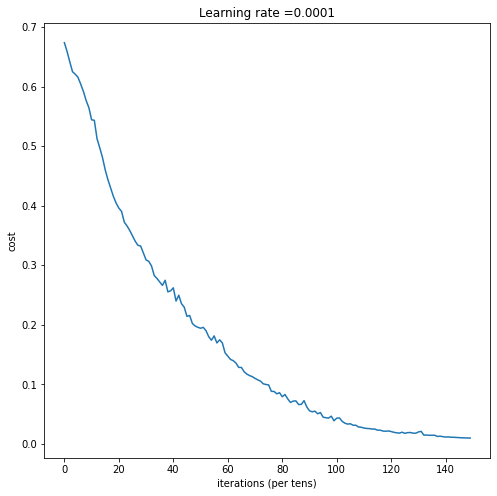



Accuracy on training set is 1.0

Accuracy on test set is 0.8799999952316284


In [ ]:
epochs= 150
evaluate_this_model(model, epochs)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 10)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 20)        1820      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 20)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 40)        7240      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 40)        